# Data Analysis Case Study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project I will be analyzing a dataset containing medical appointments in Brazil focused on predicting whether patients showed up for their appointment or not. This dataset contains 110,527 medical appointments and its 14 related variables which are represented by the columns.** 
>
> This investigation aims to find some of the important factors to know in order to predict if patitnts will show up for their appointment schedule. Some of the factors to consider include:
<ol>
    <li>Do people with underlying disease tend to show up for their appointment?
    <li>Which neighbourhood has the highest number of patient who showed up for their appointment, and which neighourhood has the lowest count?
    <li>Do we have more scholarship applicants showing up for their appointment?
<ol>

First is to importing neccessary packages and initialize

In [3]:
# importing neccessary packages
!pip install pandas
import pandas as pd # For 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# Function to set figsize
plt.rcParams["figure.figsize"]=[6,3]
# Setting font size
plt.rcParams.update({'font.size':14})


     -------------------------------------- 10.5/10.5 MB 290.3 kB/s eta 0:00:00
     ------------------------------------ 500.6/500.6 kB 407.6 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'matplotlib'

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [ ]:
# Loading and viewing the dataset
med_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
med_df.head()

In [3]:
med_df.shape

(110527, 14)

In [ ]:
# Checking the size of the data
print("This dataset contains {1} columns and {0} rows".format(med_df.shape[0], med_df.shape[1]))

###### Summary statistics

In [ ]:
med_df.describe()

<ul>
<li> .describe() method gives overview of the data statistical properties which include; mean, minimum value, maximum value, median and so on.
<li> From the summary statistics it can be observe that there is negative age which is not possible, while there is a wide gap btw the 75th percentile and the maximum age. 
<ul>

###### Checking the datatypes

In [ ]:
med_df.info()

<ul>
    <li> The .info() method helps see at a glance the column names, columns having missing values as well as the datatypes for each columns. 
    <li> It can be observed from the data that there are 9 numerical features and 5 categorical features and there are no missing values.
    <li> Also the ScheduledDay and AppointmentDay column both have a incorrect datatypes. Lastly,the ProjectId, AppintmentID columns won't be relevant for our investigation so we will drop it.
<ul>

In [9]:
med_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [10]:
# Confirming if the columns has been dropped
med_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Looking at the header, it can be observed that some of the features are wrongly spelt, let's rename the affected columns

In [12]:
label = list(med_df.columns)
label[6] = 'Hypertension'
label[9] = 'Handicap'
med_df.columns = label

# Checking if the column name has been corrected
med_df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show'],
      dtype='object')

In [9]:
# Checking unique features for each variables 
med_df.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

Looking into the No-show column to see the number of patients that showed for appointments

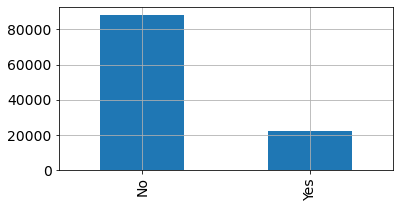

In [17]:
no_show_stat = med_df['No-show'].value_counts().plot(kind='bar', grid=True);

> Here 'No' to represent patient who showed up for their appointment why 'Yes' represent patients who did not show up for their appointment
It can be observe majority of thof the patients showed up for their appointment.

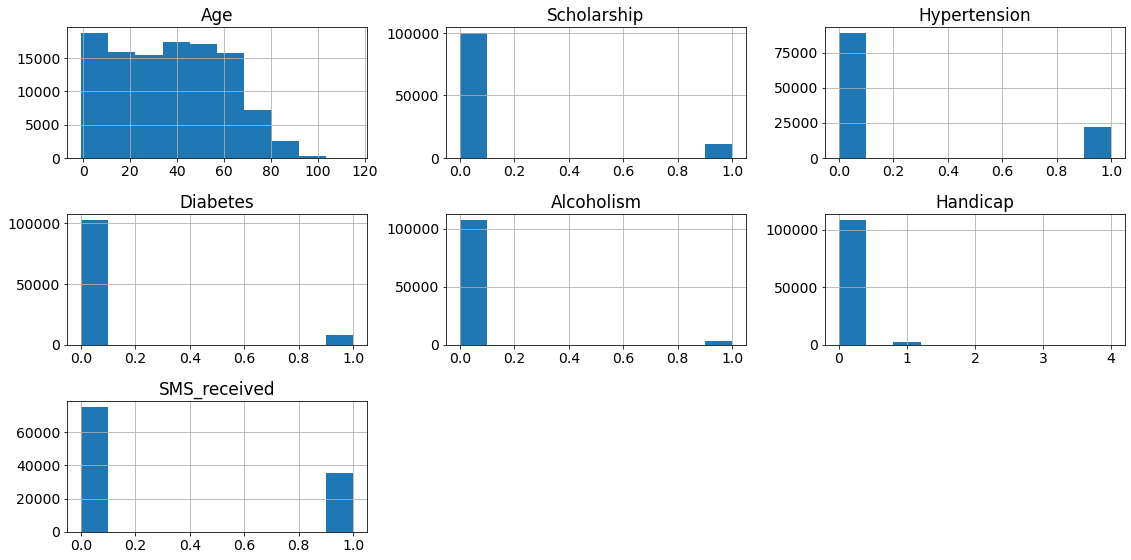

In [24]:
# Visualizing our dataset to have an overview
med_df.hist(figsize=(16,8))
plt.tight_layout();

<ul>
 <li> The histogram visualization plot helps us see the distribution of the age column & count plot for the rest of the numerical column.
 <li> it can be observed from the spread of age column that majority of the patient falls between the age of 0-60 years.
 <li> For the other numerical colums, there seems to be more patients without scholarship, hypertension, diabetes, not alcoholism, and not handicap compared to those patients with the following and because of this bias it will be right compared using aggregate measurement like average
<ul>

### Data Cleaning

As oserve from the general properties of the dataset that ScheduledDay & AppointmentDay have the wrong data type, I will proceed to correct the datatype from object datatype to datetime

In [12]:
# Fixing Incorrect datatypes
med_df['ScheduledDay'] = pd.to_datetime(med_df['ScheduledDay'])
med_df['AppointmentDay'] = pd.to_datetime(med_df['AppointmentDay'])

# Confirming the datatypes
med_df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

From the summary statistic it can was observed that the age column contain a negative value

In [13]:
# Looking closely at the Age column
med_df['Age'].sort_values().unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

###### Sorting & dropping row with negative age

In [35]:
neg_age = med_df[med_df['Age'] == -1].index
neg_age

Int64Index([], dtype='int64')

In [27]:
med_df.drop(neg_age, inplace=True)

Checking for duplicates

In [36]:
sum(med_df.duplicated())

635

In [17]:
# Dropping duplicate data
med_df.drop_duplicates(inplace=True)

In [18]:
med_df.shape

(109891, 12)

###### Re-encoding the no-show column labels for clarity sake 

In [38]:
dict = {'No':'present', 'Yes':'absent'}
med_df['No-show'].replace(dict, inplace = True)

In [39]:
med_df.sample(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
85854,F,2016-06-02T08:26:11Z,2016-06-02T00:00:00Z,52,JARDIM CAMBURI,0,1,0,0,0,0,present
32172,F,2016-05-31T12:51:54Z,2016-05-31T00:00:00Z,46,MARIA ORTIZ,0,0,0,0,0,0,present
43630,M,2016-04-19T11:04:28Z,2016-05-03T00:00:00Z,4,SANTOS DUMONT,1,0,0,0,0,0,present


In [21]:
# Creating legends from the No-show column
present = med_df['No-show'] == 'present'
absent = med_df['No-show'] == 'absent'

###### Grouping of the Age column into category

In [40]:
bin_ages = [0,12,19,40,115]
bin_labels = ['children', 'teenagers', 'young_adults', 'adults']
med_df['Age_levels'] = pd.cut(med_df['Age'], bin_ages, labels=bin_labels)

In [41]:
med_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_levels
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,present,adults
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,present,adults
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,present,adults
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,present,children
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,present,adults


<a id='eda'></a>
## Exploratory Data Analysis

######  Looking into the No-show column to see the percentage of patients that showed for appointments

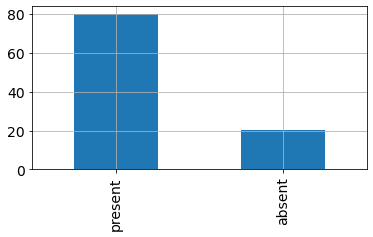

In [50]:
no_show_stat = med_df['No-show'].value_counts(normalize=True)*100
no_show_stat .plot(kind='bar', grid=True);

It can be observe that about 80% of the patients showed up for their appointment while 20% of the patients didn't show up

### Research Question 1 - Do people with underlying disease tend to show up for their appointment?

In [52]:
# Checking average number of patients that showed up & did not against underlying disease 
by_Noshow = med_df.groupby('No-show')

No-show
absent     0.169004
present    0.204394
Name: Hypertension, dtype: float64


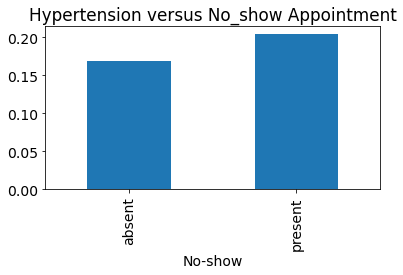

In [54]:
by_Noshow['Hypertension'].mean().plot(kind='bar', title='Hypertension versus No_show Appointment')
print(by_Noshow['Hypertension'].mean())

No-show
absent     0.064350
present    0.073707
Name: Diabetes, dtype: float64


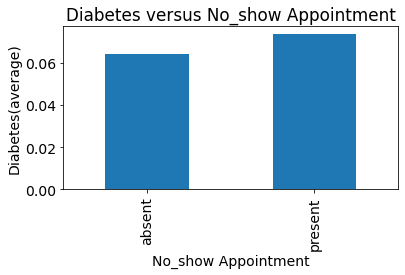

In [26]:
by_Noshow['Diabetes'].mean().plot(kind='bar', title='Diabetes versus No_show Appointment')
plt.xlabel('No_show Appointment')
plt.ylabel('Diabetes(average)')
print(by_Noshow['Diabetes'].mean())

No-show
absent     0.020138
present    0.022633
Name: Handicap, dtype: float64


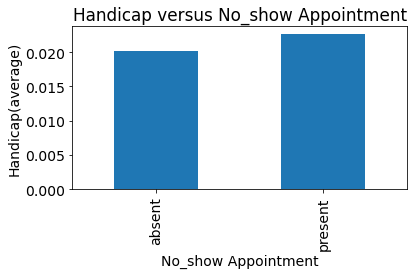

In [27]:
by_Noshow['Handicap'].mean().plot(kind='bar', title='Handicap versus No_show Appointment')
plt.xlabel('No_show Appointment')
plt.ylabel('Handicap(average)')
print(by_Noshow['Handicap'].mean())

> From the visuals aove it can be observed that on the average patients with underlying disease such as Hypertension, Diabetes and the Handicap tends to show up for their appointment. 

### Research Question 2 - Do we have more scholarship applicants showing up for their appointment?

In [28]:
med_df.groupby('No-show')['Scholarship'].mean()

No-show
absent     0.115667
present    0.093914
Name: Scholarship, dtype: float64

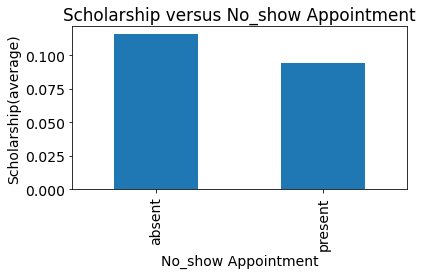

In [29]:
by_Noshow['Scholarship'].mean().plot(kind='bar', title='Scholarship versus No_show Appointment')
plt.xlabel('No_show Appointment')
plt.ylabel('Scholarship(average)');

> We can see from the chat aove that majority of the patients who were on scholarship still were absent for their appointment, which suggest that money was not the prolem

### Research Question 3 - What Age Category is mostly represented in the data? 

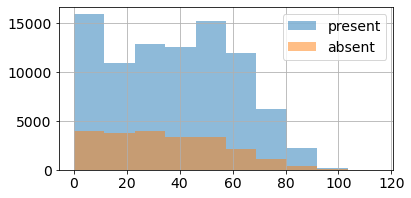

In [68]:
### Checking the Age Distribution
med_df.Age[present].hist(alpha=0.5,label='present')
med_df.Age[absent].hist(alpha=0.5,label='absent')
plt.legend();

adults          49843
young_adults    30272
children        17497
teenagers        9375
Name: Age_levels, dtype: int64


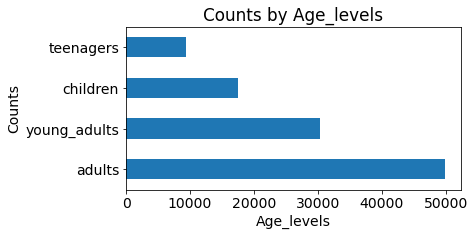

In [56]:
### Checking the Age_levels Distribution
print(med_df['Age_levels'].value_counts())
med_df['Age_levels'].value_counts().plot(kind='barh', title='Counts by Age_levels')
plt.xlabel('Age_levels')
plt.ylabel('Counts');

Age_levels    Gender
children      F          8272
              M          9146
teenagers     F          6010
              M          3294
young_adults  F         21666
              M          8393
adults        F         33751
              M         15829
Name: No-show, dtype: int64


Text(0, 0.5, 'Counts')

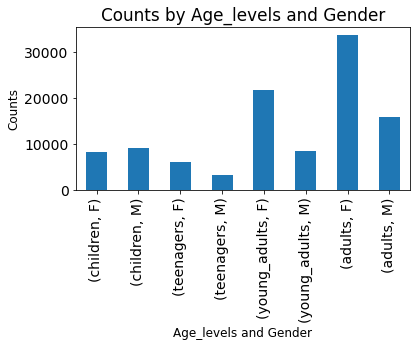

In [73]:
counts= med_df.groupby(['Age_levels', 'Gender']).count()['No-show']
print(counts)
counts.plot(kind='bar', title='Counts by Age_levels and Gender');
plt.xlabel('Age_levels and Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)

In [77]:
med_df.groupby(['No-show', 'Gender']).count()['Age_levels']

No-show  Gender
absent   F         14137
         M          7325
present  F         55562
         M         29337
Name: Age_levels, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **From Research Question 1 Charts**: 
> It can be observed that on the average people with underlying disease such as 
<ul>
  <li>Handcap
  <li>Diabetes
  <li>Hipertension
  <li>Alcoholism
<ul>

> tends to show up for their medical appointments compared to others with 
   
<ul>
  <li>Scholarship and others who received SMS 
<ul>

### Limitations: